## OSVISIT DATA SET, 81.M
## BY: MEHDI RABBAI

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\RABBAI\\Documents\\TP2\\osvisit.csv',header=None)


In [3]:

df.head()

,0
0,48176
1,35792
2,36376
3,29784
4,21296


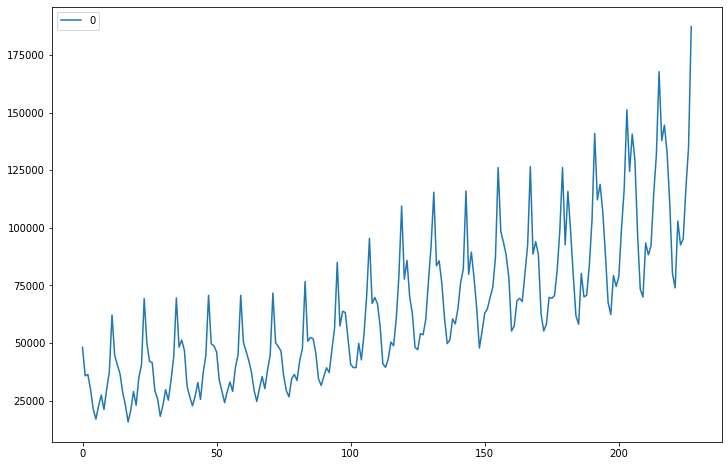

In [4]:
df.plot(figsize=(12,8))

## Preprocessing

In [5]:
len(df)
train = df.iloc[:216]
test = df.iloc[216:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# II. Machine learning modeling:


### 1. Select one machine learning model from your choice to model the given time series. 

#### The model that will be used to model the data is RNN (LSTM)

### 2. Justify the choice of your model. And prove that this model can be used for time series forecasting.


#### Long Short-Term Memory (LSTM) is a type of recurrent neural network that can learn the order dependence between items in a sequence. LSTMs have the promise of being able to learn the context required to make predictions in time series forecasting problems, rather than having this context pre-specified and fixed

### 3. Provide the form of the hypothesis set of your model.

### 4. Define the parameters and the hyper-parameters of your model.

#### Creating a time series generator

In [7]:
def generator_to_array(generator):
    """ Function that allow to extract X_train & y_train from a time series generator
    (helps us in validation since .fit function doesnt allow validation.split from a time series generator)"""
    X_train=list()
    y_train=list()
    for i in range(len(generator)):
        x=generator[i][0].flatten().tolist()
        y=generator[i][1].flatten().tolist()
        X_train.append(x)
        y_train.append(y)
    return np.array(X_train), np.array(y_train)


In [8]:

from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
# What does the first batch look like?
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.21332631 0.1318285  0.13567174 0.09229048 0.03643184 0.0083709
 0.04635583 0.07710177 0.03558948 0.09323813 0.14317397 0.30532724]
Predict this y: 
 [[0.19026686]]


#### Creating the model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
from keras.layers import Dropout

In [11]:
X_train, y_train = generator_to_array(generator)
X_train  = X_train.reshape(204,12,1)
X_train.shape

(204, 12, 1)

In [71]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=100, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
#model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

### 5. Explain the functioning of the selected model using mathematical equations and graphs. 


<div>
<img src="https://www.researchgate.net/profile/Savvas_Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_W640.jpg" width="500"/>
</div>

### 6. Provide a set of candidate models. Justify your choice.

##### This model has no dropout

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=100, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

##### This model has dropout which is a regulator that can lead to better results (chosen)

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=100, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### we can also change the number of nodes in LSTM layer which can lead to a more complex model but not necessary better results

### 7. Choose one learning algorithm to minimize your cost function. Justify your choice.


##### a) Select a learning rate of your algorithm (constant or adaptive learning rate). Justify your choice. If it is adaptive provide the adaption technique.


##### The learning rate is adaptive, since this one provides better results & adapts to the data, the optimizer used is ADAM (adaptive moment estimation optimizer)

##### b) Fix the parameters of your learning algorithm.


### 8. Use your models to learn the parameters based on training data, and save the training performances.

In [113]:
ES = keras.callbacks.EarlyStopping(patience = 5)
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=1, 
    validation_split=0.1,
    shuffle=False,

)

Epoch 1/30
183/183 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2/30
183/183 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 9/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0015

In [96]:
model2 = keras.Sequential()
model2.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=100, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
    
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(keras.layers.Dense(units=1))
model2.compile(loss='mean_squared_error', optimizer='adam')


In [114]:
ES = keras.callbacks.EarlyStopping(patience = 5)
history = model2.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=1, 
    validation_split=0.1,
    shuffle=False,
)

Epoch 1/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 2/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/30
183/183 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0014

### 9. Select the best model using the validation data.

In [115]:
print("Model 1 Val loss = ", model.history.history["val_loss"][-1])
print("Model 2 Val loss = ", model2.history.history["val_loss"][-1])

Model 1 Val loss =  0.0016260950360447168
Model 2 Val loss =  0.0021597326267510653


### We'll continue using Model 1

### 10. Test your selected model on the testing data and retain your results based on the statistical metrics.


In [116]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [117]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

In [118]:
import math
from sklearn.metrics import mean_squared_error
# Calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(original_train[-len(true_train_predictions):], true_train_predictions))
# print('M2 Train Score: %.2f RMSE' % (trainScore))
# trainScore = math.sqrt(mean_squared_error(original_train[-len(true_train_predictions_):], true_train_predictions_))
# print('m1 Test Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(test[0],test_["Predictions"]))
#print('M2 Train Score: %.2f RMSE' % (testScore))
testScore = math.sqrt(mean_squared_error(test[0],test["Predictions"]))
print('M1 Test Score: %.2f RMSE' % (testScore))

M1 Test Score: 5838.17 RMSE


### 11. Is there any overfitting or underfitting problem? 

 #### The validation loss dont increase at the end which indicates the absence of overfitting

### 12. Propose a solution to fix the problem of overfitting? 

#### In case of overfitting, Early stopping can be usedwhen fitting the model to avoid overfitting 

### 13. If there is any overfitting problem try to fix it using the proposed solution. And compare the performance before and after applying the solution. What can you notice?


### 14. Plot in the same graph the real and estimation training data for statistical and machine learning model. What can you notice?

In [119]:
train_predictions =model2.predict_generator(generator)


In [120]:
true_train_predictions = scaler.inverse_transform(train_predictions)


In [121]:
original_train = scaler.inverse_transform(generator.data)

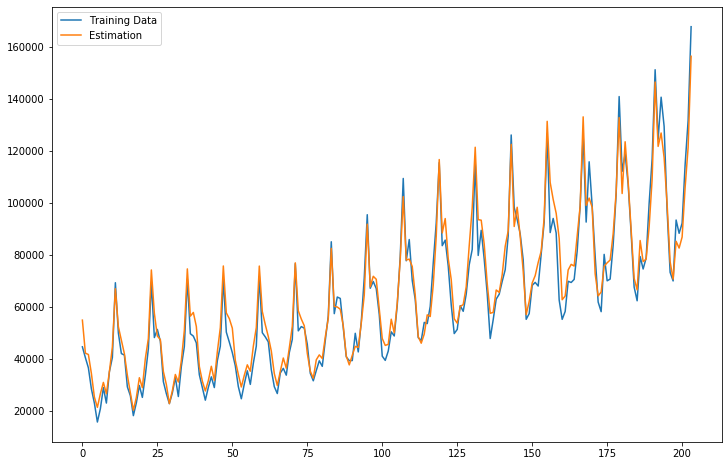

In [122]:
plt.figure(figsize=(12,8))

plt.plot(range(0,len(true_train_predictions)),original_train[-len(true_train_predictions):],label="Training Data")
plt.plot(range(0,len(true_train_predictions)),true_train_predictions,label="Estimation ")
plt.legend()
plt.show()

### The model has well modeled the training data and understood the logic of the data

### 15. Plot in the same graph the real and estimation testing data for statistical and machine learning model. What can you notice?

In [123]:
reshaped = test["Predictions"].values.reshape((len(test["Predictions"]),1))



In [124]:
all_predictions = np.concatenate((true_train_predictions,reshaped))

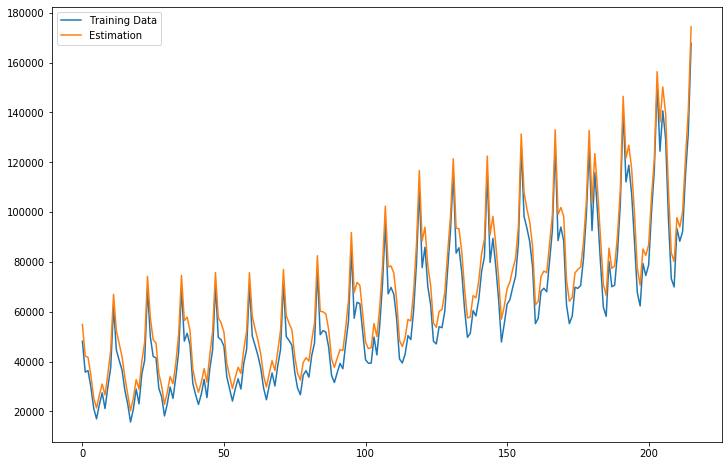

In [125]:
plt.figure(figsize=(12,8))

plt.plot(range(0,len(all_predictions)),df[:len(all_predictions)],label="Training Data")
plt.plot(range(0,len(all_predictions)),all_predictions,label="Estimation ")
plt.legend()
plt.show()

### The predictions fit well the test data which means our model is good

### 16. Compare the computed training and testing performances of the statistical model and machine learning model.


#### Both the machine learning model & the statistical model give good results

### 17. What can you conclude about your data? And what are your suggestions?

#### The seasonal component of the data made it harder for some models like the Arima ones to well predict its behavior, luckly the presence of models like the Sarima ones that takes into accounts the seasonality of the time series gives better results and better modelling, when it comes to machine learning the LSTM gives far better result and it doesnt require any conditions on the stationarity or the seasonality of the time series which makes this approch a solid one